# 로또 당첨 번호 분석해보기

## 목차
<br>

1. 로또 1등 당첨 확률은 얼마나 될까?
<br>

1. 로또 1등 당첨의 모든 경우의 수를 구해볼 수 있을까?
<br>

1. 로또 1등 당첨 번호의 합계로 무언가 해볼 수 있을까?
<br>

1. 로또 1등 당첨 번호에 중심극한정리가 적용될까?
<br>

<br>
<span style='color: orange; background-color: darkgreen;'>* 경고! 당신의 시간을 낭비할 수 있습니다.</span>

## 로또 1등 당첨 확률은 얼마나 될까?


In [1]:
numerator = 6 * 5 * 4 * 3 * 2 * 1
denominator = 45 * 44 * 43 * 42 * 41 * 40

In [2]:
# 1등에 당첨될 확률
f'{(numerator / denominator) * 100:.67f} %'

'0.0000122773803998988342172683785324949212736100889742374420166015625 %'

## 로또 1등 당첨의 모든 경우의 수를 구해보자.

In [3]:
# 1등 당첨의 경우의 수
int(denominator / numerator)

8145060

In [4]:
from itertools import combinations

In [7]:
import pandas as pd

In [5]:
lotto_numbers = list(range(1, 46))

In [6]:
print(lotto_numbers)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


In [8]:
df = pd.DataFrame(list(combinations(lotto_numbers, 6)))

In [9]:
df.columns = list(range(1, 7))

In [10]:
df.shape

(8145060, 6)

In [11]:
df.sample(10)

,1,2,3,4,5,6
3810825,5,8,9,26,32,40
770731,1,11,13,26,31,45
2909945,4,5,7,10,18,38
3889515,5,9,13,15,28,29
2591301,3,11,15,20,40,44
2093826,3,4,10,16,37,38
487673,1,6,17,21,32,45
6457342,10,20,21,28,29,44
3623346,4,24,25,35,40,44
5597924,8,13,17,30,35,45


## 로또 1등 당첨 번호는 과연 공평할까?

In [12]:
df_sum = df.copy(deep=True)

In [13]:
df_sum['sum'] = df_sum[1] + df_sum[2] + df_sum[3] + df_sum[4] + df_sum[5] + df_sum[6]

In [14]:
df_sum.sample(10)

,1,2,3,4,5,6,sum
302232,1,4,14,19,20,33,91
1186210,2,3,21,26,29,33,114
5479306,8,10,19,24,34,43,138
1013530,1,19,24,28,37,41,150
5629599,8,14,17,32,42,44,157
7910992,19,30,32,36,37,38,192
7025268,12,26,33,36,39,44,190
3327010,4,11,12,20,26,31,104
7505813,15,21,28,29,38,39,170
7410604,15,16,17,24,29,45,146


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
plt.ion()

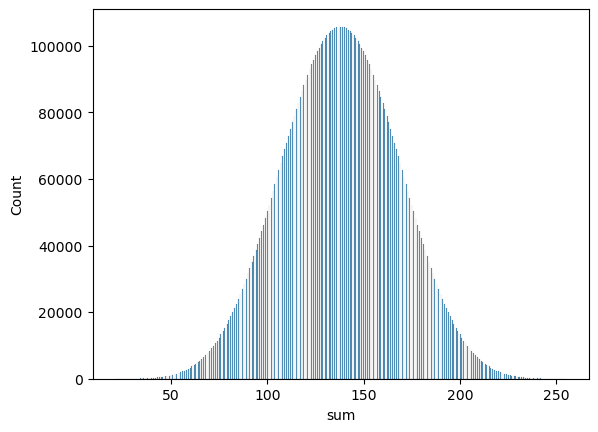

In [17]:
sns.histplot(
    data=df_sum,
    x='sum'
);

In [18]:
df_sum.describe()

,1,2,3,4,5,6,sum
count,8.145060e+06,8.145060e+06,8.145060e+06,8.145060e+06,8.145060e+06,8.145060e+06,8.145060e+06
mean,6.571429e+00,1.314286e+01,1.971429e+01,2.628571e+01,3.285714e+01,3.942857e+01,1.380000e+02
std,5.240151e+00,6.765006e+00,7.410693e+00,7.410693e+00,6.765006e+00,5.240151e+00,2.994996e+01
min,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,2.100000e+01
25%,2.000000e+00,8.000000e+00,1.400000e+01,2.100000e+01,2.800000e+01,3.700000e+01,1.170000e+02
50%,5.000000e+00,1.200000e+01,1.900000e+01,2.700000e+01,3.400000e+01,4.100000e+01,1.380000e+02
75%,9.000000e+00,1.800000e+01,2.500000e+01,3.200000e+01,3.800000e+01,4.400000e+01,1.590000e+02
max,4.000000e+01,4.100000e+01,4.200000e+01,4.300000e+01,4.400000e+01,4.500000e+01,2.550000e+02


In [19]:
df_sum.loc[df_sum['sum'] == 138].describe()

,1,2,3,4,5,6,sum
count,105690.000000,105690.000000,105690.000000,105690.000000,105690.000000,105690.000000,105690.0
mean,5.698713,12.079960,19.206434,26.793566,33.920040,40.301287,138.0
std,3.635337,4.204055,3.942977,3.942977,4.204055,3.635337,0.0
min,1.000000,2.000000,3.000000,14.000000,21.000000,26.000000,138.0
25%,3.000000,9.000000,17.000000,24.000000,31.000000,38.000000,138.0
50%,5.000000,12.000000,19.000000,27.000000,34.000000,41.000000,138.0
75%,8.000000,15.000000,22.000000,29.000000,37.000000,43.000000,138.0
max,20.000000,25.000000,32.000000,43.000000,44.000000,45.000000,138.0


## 로또

In [ ]:
df_real = pd.read_csv('./data/lotto.csv', encoding='utf-8')

In [ ]:
df_real[['연', '월', '일']] = df_real['날짜'].str.split('.', expand=True).astype(int)
df_real = df_real.drop(columns='날짜')

In [ ]:
df_real.sample(10)

In [ ]:
df_real.info()

In [ ]:
cols = ['1등수', '1등금액', '2등수', '2등금액', '3등수', '3등금액', '4등수', '4등금액', '5등수', '5등금액']
for col in cols:
    if df_real[col].dtype == 'object':
        df_real[col] = df_real[col].str.replace(',', '').astype(int)

In [ ]:
df_real.sample(10)

In [ ]:
df_real.info()

In [ ]:
df_real['sum'] = df_real['1'] + df_real['2'] + df_real['3'] + df_real['4'] + df_real['5'] + df_real['6']

In [ ]:
df_real.sample(10)

In [ ]:
sns.histplot(
    data=df_real[['sum']],
    x='sum',
    bins=list(range(110, 171, 1))
);

In [ ]:
sns.histplot(
    data=df_real[['sum']],
    x='sum',
    bins=list(range(21, 255, 1)),
    kde=True
);

In [ ]:
df_real[['1', '2', '3', '4', '5', '6', 'sum']].astype('object').describe()

In [ ]:
df_real[['1', '2', '3', '4', '5', '6', 'sum']].describe()

In [ ]:
df_sum.loc[df_sum['sum'] == 138].describe()

In [ ]:
import pingouin as pg

In [ ]:
pg.ttest(df_sum['sum'], df_real['sum'])
# 귀무가설: 두 집단의 평균은 같다.

In [ ]:
f"{pg.compute_effsize(df_sum['sum'], df_real['sum'], eftype='eta-square') * 100:.20f}"

In [ ]:
sns.boxplot(
    data=df_sum,
    x='sum'
)

In [ ]:
sns.boxplot(
    data=df_real,
    x='sum'
)

In [ ]:
117, 137.5, 162

In [ ]:
sns.violinplot(
    data=df_real,
    x='sum'
)

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(
    data_frame=df_real,
    x='sum',
    nbins=150
)

In [ ]:
5 + 12 + 19 + 27 + 34 + 41

In [ ]:
# 5 12 19 27 34 41
df_real.loc[
    (df_real['1'] == 5)
    & (df_real['2'] == 12)
    & (df_real['3'] == 19)
    & (df_real['4'] == 27)
    & (df_real['5'] == 34)
    & (df_real['6'] == 41)
    , ['1', '2', '3', '4', '5', '6', 'sum']
]

In [ ]:
df_real['1'].value_counts()

In [ ]:
df_sum.loc[(df_sum['sum'] >= 117) & (df_sum['sum'] <= 162)].shape

In [ ]:
df_sum.loc[(df_sum['sum'] >= 117) & (df_sum['sum'] <= 162)].astype('O').describe()

In [ ]:
pd.set_option('display.max_columns', 100)

In [ ]:
df_real.head()

In [ ]:
px.line(
    data_frame=df_real,
    x='회차',
    y='1'
)

In [ ]:
pg.compute_effsize()